In [1]:
# https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
# pyimagesearch.com/2016/10/03/bubble-sheet-multiple-choice-scanner-and-test-grader-using-omr-python-and-opencv/

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

#### LOAD IMAGE

821 1271 3


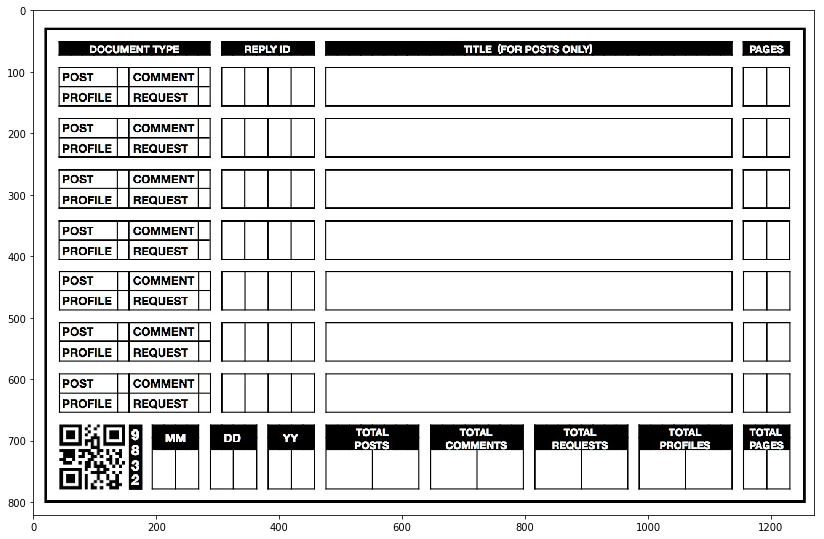

In [2]:
img_name = 'deposit_slip_04_04_18.jpg'
img_loc = 'data/'

img = cv2.imread(img_loc + img_name)

w, h, c = img.shape
print w, h, c

plt.figure(figsize = (14,18))
plt.imshow(img)

#### APPLY OTSU'S THRESHOLD (NECCESSARY DUE TO B&W START?)

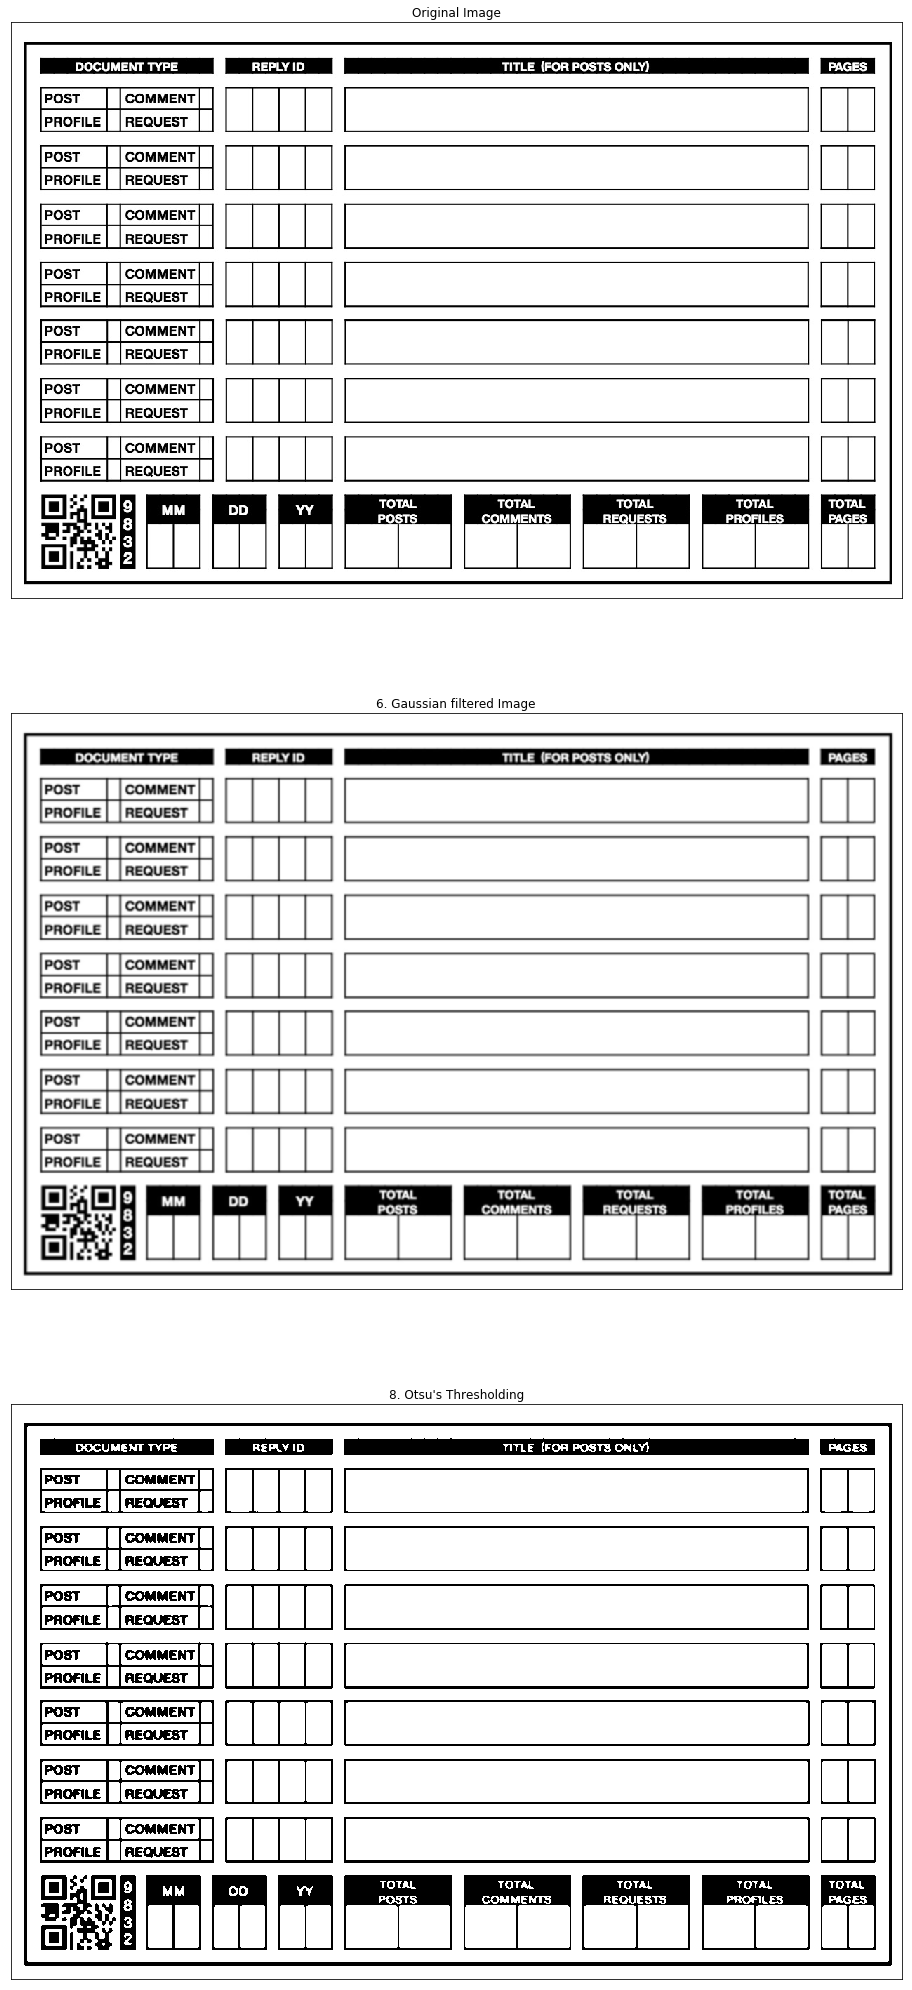

In [3]:
img_name = 'deposit_slip_04_04_18.jpg'
img_loc = 'data/'


img = cv2.imread(img_loc + img_name, 0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['0. Original Noisy Image','1. Histogram','2. Global Thresholding (v=127)',
          '3. Original Noisy Image','4. Histogram',"5. Otsu's Thresholding",
          '6. Gaussian filtered Image','7. Histogram',"8. Otsu's Thresholding"]

plt.figure(figsize = (28,36))

rows = 3
cols = 1

# print '6. Original'
plt.subplot(rows,cols,1),plt.imshow(img,'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# print '6. Gaussian filtered Image'
plt.subplot(rows,cols,2),plt.imshow(images[6],'gray')
plt.title(titles[6]), plt.xticks([]), plt.yticks([])

# print "8. Otsu's Thresholding"
plt.subplot(rows,cols,3),plt.imshow(images[8],'gray')
plt.title(titles[8]), plt.xticks([]), plt.yticks([])
    
plt.show()

LEN: 4 WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
LEN: 4 WIDTH: 26 HEIGHT: 26 ASPECT RATIO: 1.0
LEN: 4 WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
LEN: 4 WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
LEN: 4 WIDTH: 25 HEIGHT: 25 ASPECT RATIO: 1.0
LEN: 4 WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538

1070 306 6


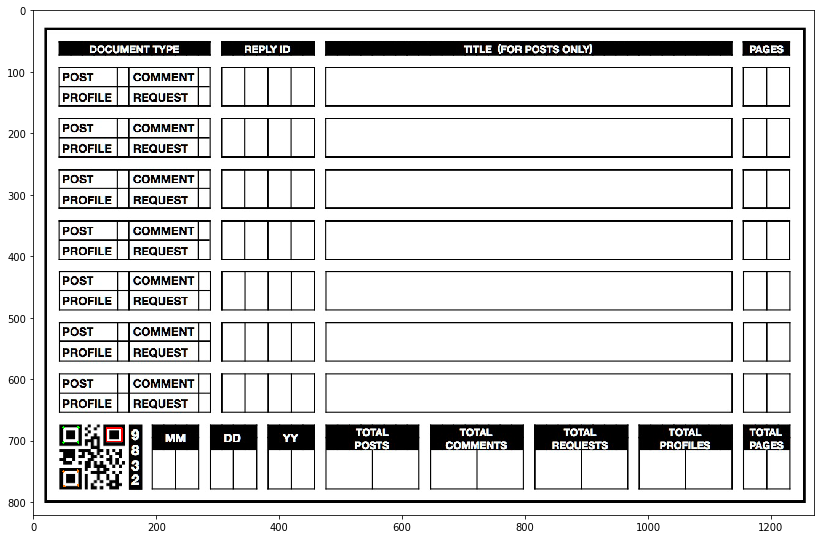

In [95]:
img_name = 'deposit_slip_04_04_18.jpg'
img_loc = 'data/'

img = cv2.imread(img_loc + img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

im2, contours, hierarchy = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

quad_cntrs = []
ar_ones = []
approxes = []

if len(contours) > 0:
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # loop over the sorted contours
    for contour in contours:
        # approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            quad_cntrs.append(contour)
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            
            min_length = 25
            max_length = 26
            
            if (min_length <= w <= max_length) and (min_length <= h <= max_length) and ar >= 0.9 and ar <= 1.1:
                print 'LEN:', len(approx), 'WIDTH:', w, 'HEIGHT:', h, 'ASPECT RATIO:', ar
#                 print approx
                ar_ones.append(contour)
                approxes.append(approx)
            
print ''
print len(contours), len(quad_cntrs), len(ar_ones)

# cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.figure(figsize = (14,18))
# plt.imshow(cv2.drawContours(img, quad_contours[-18:-17], -1, (0,0,255), 3))
# plt.imshow(cv2.drawContours(img, quad_contours[-60:-55], -1, (0,0,255), 3))
# plt.imshow(cv2.drawContours(img, approxes[0], -1, (255,0,0), 3))
plt.imshow(cv2.drawContours(img, approxes[2], -1, (0,255,0), 3))
plt.imshow(cv2.drawContours(img, approxes[5], -1, (255,120,0), 3))

p1 = tuple(approxes[1][0][0])
p2 = tuple(approxes[1][2][0])
plt.imshow(cv2.rectangle(img, p1, p2, (255,0,0), 2))




# 3: WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
# 3: WIDTH: 26 HEIGHT: 26 ASPECT RATIO: 1.0
# 2: WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
# 2: WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538
# 1: WIDTH: 25 HEIGHT: 25 ASPECT RATIO: 1.0
# 1: WIDTH: 25 HEIGHT: 26 ASPECT RATIO: 0.961538461538

In [90]:
# print tuple(approxes[0][0][0]), tuple(approxes[0][2][0])

p1 = tuple(approxes[0][0][0])
p2 = tuple(approxes[0][2][0])

p1 = tuple(approxes[0][0][0])
p2 = tuple(approxes[0][2][0])

p1 = tuple(approxes[0][0][0])
p2 = tuple(approxes[0][2][0])

print p1, p2

(119, 678) (142, 703)


#### FIND CONTOURS OF QR CODE

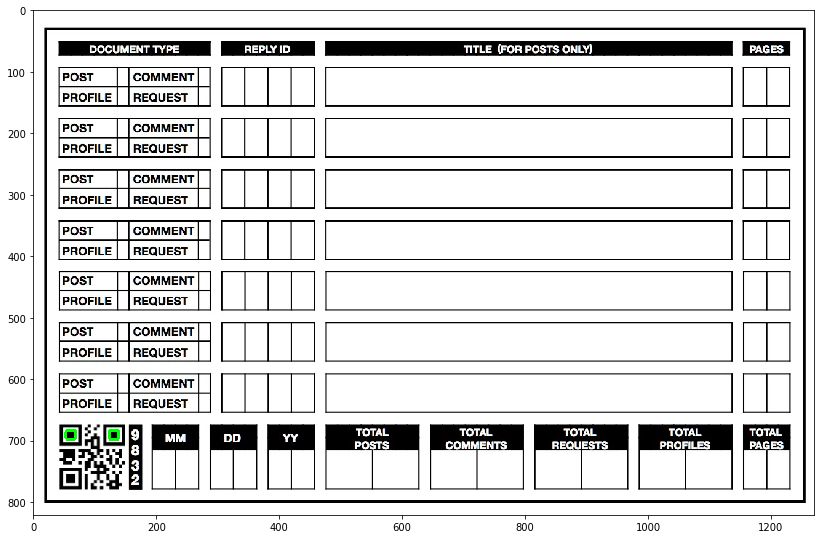

In [183]:
img_name = 'deposit_slip_04_04_18.jpg'
img_loc = 'data/'

img = cv2.imread(img_loc + img_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)

# ret,thresh = cv2.threshold(img,0,255,0)
im2, contours, hierarchy = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# ensure that at least one contour was found

quad_contours = []

if len(contours) > 0:
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # loop over the sorted contours
    for contour in contours:
        # approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            quad_contours.append(contour)
    
# cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.figure(figsize = (14,18))
plt.imshow(cv2.drawContours(img, quad_contours[-11:-9], -1, (0,255,0), 3))

#### IDENTIFY QR CODE CORNERS

In [163]:
len(quad_contours)

282

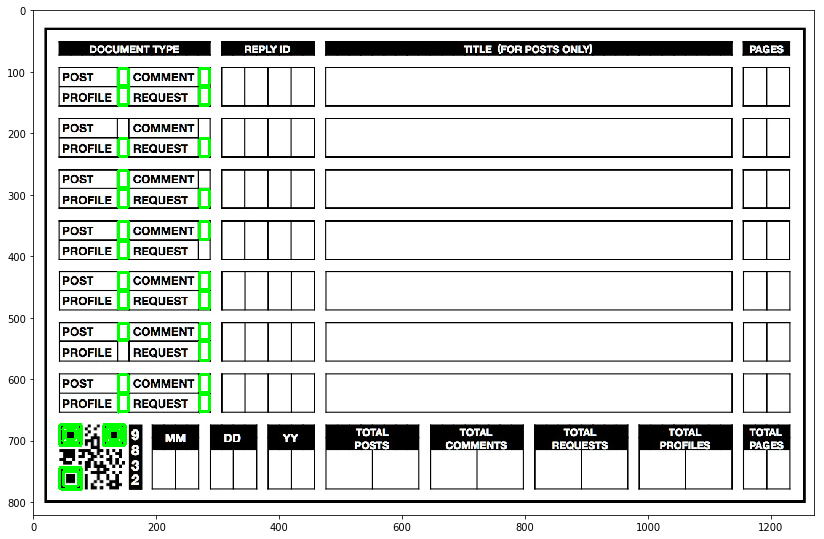

In [191]:
plt.figure(figsize = (14,18))
plt.imshow(cv2.drawContours(img, quad_contours[-11:-9], -1, (0,255,0), 3))
plt.imshow(cv2.drawContours(img, quad_contours[-41:-39], -1, (0,255,0), 3))

In [178]:
%matplotlib inline

from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

0

In [2]:
import numpy as np
import cv2
import cv2.aruco as aruco


# '''
#     drawMarker(...)
#         drawMarker(dictionary, id, sidePixels[, img[, borderBits]]) -> img
# '''

# aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
# print(aruco_dict)
# # second parameter is id number
# # last parameter is total image size
# img = aruco.drawMarker(aruco_dict, 2, 700)
# cv2.imwrite("test_marker.jpg", img)

# cv2.imshow('frame',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

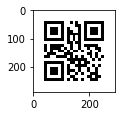

In [30]:
import qrcode
simple_qr = qrcode.make(3892)
plt.figure(figsize = (1.5,1.5))
plt.imshow(simple_qr)

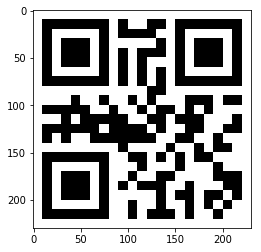

In [24]:
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=1,
)
qr.add_data(3892)
qr.make()

adv_qr = qr.make_image(fill_color="white", back_color="black")
plt.imshow(adv_qr)

In [6]:
img = aruco.drawMarker(aruco_dict, 3892, 50)

error: /home/travis/miniconda/conda-bld/conda_1485299288502/work/opencv-3.2.0/opencv_contrib-3.2.0/modules/aruco/src/dictionary.cpp:167: error: (-215) id < bytesList.rows in function drawMarker
